# Training of the CAM model

## Librairies

In [1]:
# --- Utils librairies ---
#Generics librairies
import os, sys
import os.path

#Measure librairies
import time

# --- Personal scripts ---
sys.path.insert(1, '../scripts/')
from data_manager.data_script import *
from model_manager.model_script import *

## GPUS environment

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="1,2,3,4";
gpus_list = [0, 1, 2, 3]

## Load data

In [3]:
train_dataset, validation_dataset, test_dataset, _ = loadAndPrepareData("../data/dataset_COVID_RAW.pkl", "../train_settings/training_settings_cov_raw.pckl", False)

## Model

### Train

In [4]:
numEpochs = 273
patience = 50
directoryToSaveModel = "../saved_models/CAM_Covid"
models_list, devices = trainingLoop(gpus_list, numEpochs, patience, train_dataset, validation_dataset, directoryToSaveModel, CAM=True)

------------------------------ Model 1 already exist, we load it ! ------------------------------
------------------------------ Final result of the model ! ------------------------------
Train loss : 0.5752500128194244; Train accuracy : 0.9795926584271808; 
 Validation loss : 0.6486461386003021; Validation accuracy : 0.9083333333333333
------------------------------ Model 2 already exist, we load it ! ------------------------------
------------------------------ Final result of the model ! ------------------------------
Train loss : 0.5639506787961865; Train accuracy : 0.9893156541404629; 
 Validation loss : 0.6220096737579766; Validation accuracy : 0.9372384937238494
------------------------------ Model 3 already exist, we load it ! ------------------------------
------------------------------ Final result of the model ! ------------------------------
Train loss : 0.584393804409375; Train accuracy : 0.970739490070944; 
 Validation loss : 0.6068370284434981; Validation accuracy : 0.94

## Test

In [6]:
X_set, Y_set, groups, folds, final_test_set = loadData("../data/dataset_COVID_RAW.pkl", False)

In [8]:
patients = np.array(groups)
patients = np.unique(patients)

In [9]:
patient_level_prediction = {}
for patient in patients:
    patient_level_prediction[patient] =  [0,0,0]

In [11]:
df, labels, names = pd.read_pickle("../data/dataset_COVID_RAW.pkl")
df = pd.DataFrame(df)
labels = pd.Series(labels, name = 'label')
names = pd.Series(names, name = 'names')
df = pd.concat((df, labels, names), axis = 1)

In [12]:
patient_level_real = {}
for patient in patients:
    patient_level_real[patient] = df[df["names"] == patient]['label'].values[0]

------------------------------ Let's predict with model 1 ! ------------------------------
------------------------------ Model 1 predict with 1.0 of accuracy at the spectra level ------------------------------
------------------------------ Let's predict with model 2 ! ------------------------------
------------------------------ Model 2 predict with 1.0 of accuracy at the spectra level ------------------------------
------------------------------ Let's predict with model 3 ! ------------------------------
------------------------------ Model 3 predict with 1.0 of accuracy at the spectra level ------------------------------
------------------------------ Let's predict with model 4 ! ------------------------------
------------------------------ Model 4 predict with 1.0 of accuracy at the spectra level ------------------------------
------------------------------ Let's predict with model 5 ! ------------------------------
------------------------------ Model 5 predict with 1.0 of accura

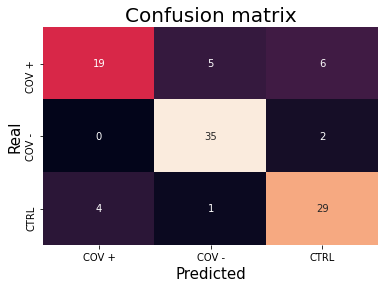

In [13]:
testLoop(models_list, test_dataset, devices, groups, folds, patient_level_prediction, patient_level_real)